# Machine Learning
1. Multi-Variate Linear Regression
2. CramerV Correlation
3. Random Forest Model

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [ ]:
df = pd.read_csv('Data/2. EDA.csv')

In [54]:
df.head()

,Day,Month,Year,Make,Aircraft.damage,Aircraft.Category,Number.of.Engines,Engine.Type,Weather.Condition,Broad.phase.of.flight,Fatal,Injured,Uninjured,Fatal.Cat,Fatal.Count,Latitude,Longitude
0,1,1,1982,BEECH,Substantial,NaN,1,Reciprocating,VMC,Landing,0.0,0.0,1.0,Non-Fatal,0,0.0,0.0
1,2,1,1982,BEECH,Destroyed,Airplane,1,Reciprocating,IMC,Cruise,2.0,0.0,0.0,Fatal,2,0.0,0.0
2,6,1,1982,BEECH,Substantial,Airplane,1,Reciprocating,VMC,Climb,0.0,0.0,3.0,Non-Fatal,0,0.0,0.0
3,7,1,1982,BEECH,Substantial,Airplane,1,Reciprocating,VMC,Approach,0.0,0.0,1.0,Non-Fatal,0,0.0,0.0
4,12,1,1982,BEECH,Substantial,Airplane,1,Reciprocating,IMC,Descent,0.0,1.0,1.0,Non-Fatal,0,0.0,0.0


/Users/ester/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

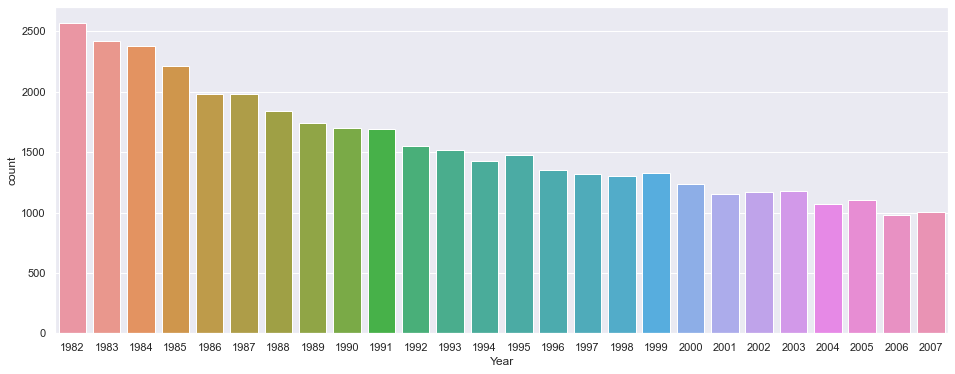

In [55]:
temp_1 = df.sort_values(by = ["Year"]).reset_index(drop = True)
plt.figure(figsize=(16, 6))
sb.countplot(temp_1["Year"])

## 1. Multi-Variate Linear Regression Model

Response Variable: **Chance of Fatality**

Predictor Variable: **Make, Aircraft Damage, Number of Engines, Engine Type, Weather Condition, Broad Phase**

Question: What's the relation between the different varirables and the fatal count for accident?

In [56]:
df.head()

,Day,Month,Year,Make,Aircraft.damage,Aircraft.Category,Number.of.Engines,Engine.Type,Weather.Condition,Broad.phase.of.flight,Fatal,Injured,Uninjured,Fatal.Cat,Fatal.Count,Latitude,Longitude
0,1,1,1982,BEECH,Substantial,NaN,1,Reciprocating,VMC,Landing,0.0,0.0,1.0,Non-Fatal,0,0.0,0.0
1,2,1,1982,BEECH,Destroyed,Airplane,1,Reciprocating,IMC,Cruise,2.0,0.0,0.0,Fatal,2,0.0,0.0
2,6,1,1982,BEECH,Substantial,Airplane,1,Reciprocating,VMC,Climb,0.0,0.0,3.0,Non-Fatal,0,0.0,0.0
3,7,1,1982,BEECH,Substantial,Airplane,1,Reciprocating,VMC,Approach,0.0,0.0,1.0,Non-Fatal,0,0.0,0.0
4,12,1,1982,BEECH,Substantial,Airplane,1,Reciprocating,IMC,Descent,0.0,1.0,1.0,Non-Fatal,0,0.0,0.0


In [57]:
df['Fatal Ratio'] = (df['Fatal'] / (df['Fatal'] + df['Injured'] + df['Uninjured']))*100
df['Fatal Ratio'] = df['Fatal Ratio'].fillna(value=0.0)
df.to_csv('Data/3. ML_LinearRegression.csv')

In [58]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (40680, 18)


In [59]:
print(df.dtypes)

Day                       object
Month                     object
Year                      object
Make                      object
Aircraft.damage           object
Aircraft.Category         object
Number.of.Engines          int64
Engine.Type               object
Weather.Condition         object
Broad.phase.of.flight     object
Fatal                    float64
Injured                  float64
Uninjured                float64
Fatal.Cat                 object
Fatal.Count                int64
Latitude                  object
Longitude                 object
Fatal Ratio              float64
dtype: object


In [60]:
X = pd.DataFrame(df[["Make", "Aircraft.damage", "Number.of.Engines", "Engine.Type", "Weather.Condition", "Broad.phase.of.flight"]])
## Encode Cat data --> Numerical data
X = X.replace({'BEECH': 1, 'BELL': 2, 'BELLANCA': 3, 'BOEING': 4, 'CESSNA': 5, 'GRUMMAN': 6, 'HUGHES': 7, 'MOONEY': 8, 'PIPER': 9, 'ROBINSON': 10})
X = X.replace({'Minor': 1, 'Substantial': 2, 'Destroyed': 3})
X = X.replace({'VMC': 1, 'IMC': 2})
X = X.replace({'Standing': 1, 'Taxi': 2, 'Takeoff': 3, 'Climb': 4, 'Cruise': 5, 'Descent': 6, 'Maneuvering': 7, 'Approach': 8, 'Landing': 9, 'Go-around': 10})
X = X.replace({'Reciprocating': 1, 'Turbo Fan': 2, 'Turbo Jet': 3, 'Turbo Prop': 4, 'Turbo Shaft': 5})
X.to_csv('Data/3. ML_Data (Regression).csv')


Training Features Shape:  (30510, 6)
Training Labels Shape:  (30510, 1)
Testing Features Shape:  (10170, 6)
Testing Labels Shape:  (10170, 1)
Intercept of Regression 	: b =  [-119.66012459]
Coefficients of Regression 	: a =  [[-4.67637623e-02  4.88169437e+01  3.42079712e+00 -6.03415616e-01
   2.32129193e+01 -2.48302012e-01]]

              Predictors  Coefficients
0                   Make     -0.046764
1        Aircraft.damage     48.816944
2      Number.of.Engines      3.420797
3            Engine.Type     -0.603416
4      Weather.Condition     23.212919
5  Broad.phase.of.flight     -0.248302



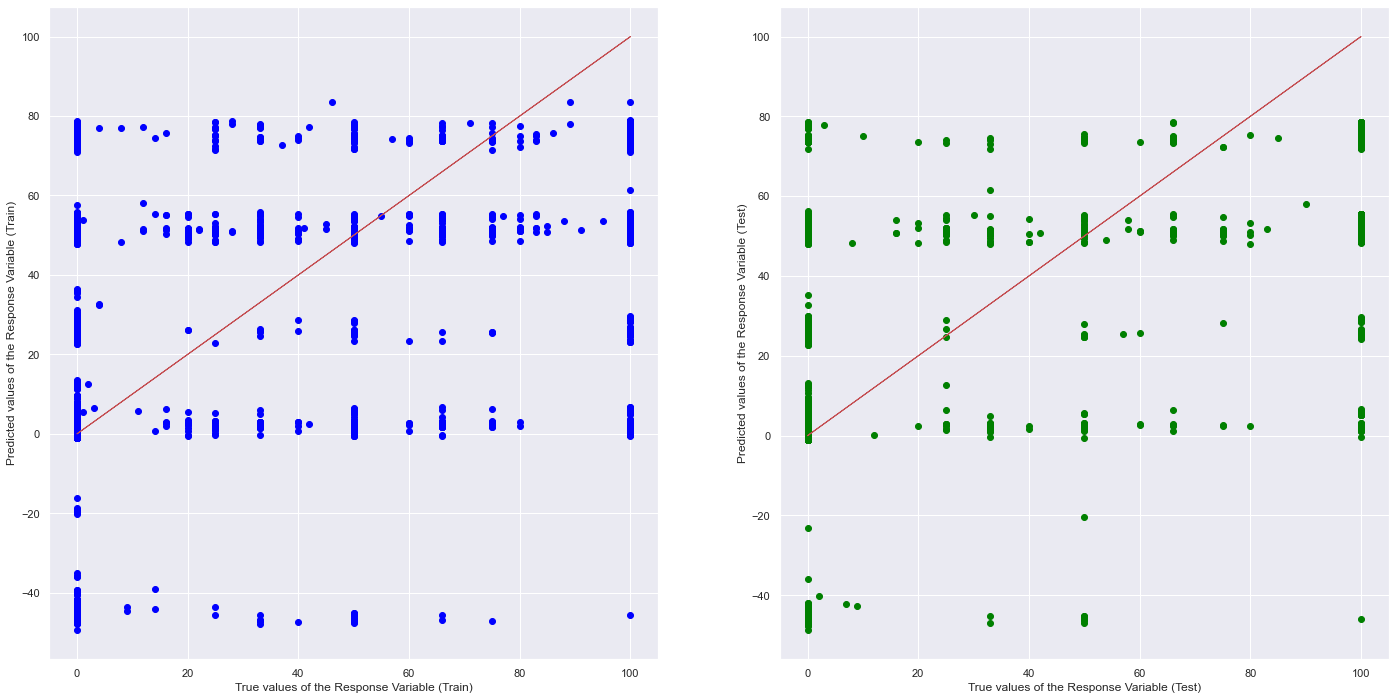

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.47007165649732985
Mean Squared Error (MSE) 	: 663.6377490859732

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.46147534402857326
Mean Squared Error (MSE) 	: 679.8702583595779



<Figure size 432x288 with 0 Axes>

In [61]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
df["Fatal Ratio"] = df["Fatal Ratio"].astype('int')

y = pd.DataFrame(df["Fatal Ratio"])
X = pd.DataFrame(df[["Make", "Aircraft.damage", "Number.of.Engines", "Engine.Type", "Weather.Condition", "Broad.phase.of.flight"]])

## Encode Cat data --> Numerical data
X = X.replace({'BEECH': 1, 'BELL': 2, 'BELLANCA': 3, 'BOEING': 4, 'CESSNA': 5, 'GRUMMAN': 6, 'HUGHES': 7, 'MOONEY': 8, 'PIPER': 9, 'ROBINSON': 10})
X = X.replace({'Minor': 1, 'Substantial': 2, 'Destroyed': 3})
X = X.replace({'VMC': 1, 'IMC': 2})
X = X.replace({'Standing': 1, 'Taxi': 2, 'Takeoff': 3, 'Climb': 4, 'Cruise': 5, 'Descent': 6, 'Maneuvering': 7, 'Approach': 8, 'Landing': 9, 'Go-around': 10})
X = X.replace({'Reciprocating': 1, 'Turbo Fan': 2, 'Turbo Jet': 3, 'Turbo Prop': 4, 'Turbo Shaft': 5})
X.to_csv('Data/3. ML_Data (Regression).csv')

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print('Training Features Shape: ', X_train.shape)
print('Training Labels Shape: ', y_train.shape)
print('Testing Features Shape: ', X_test.shape)
print('Testing Labels Shape: ', y_test.shape)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()
plt.savefig('Images/LinearRegression/RatioVsVariables.png')

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

## 2. Cramer V Correlation

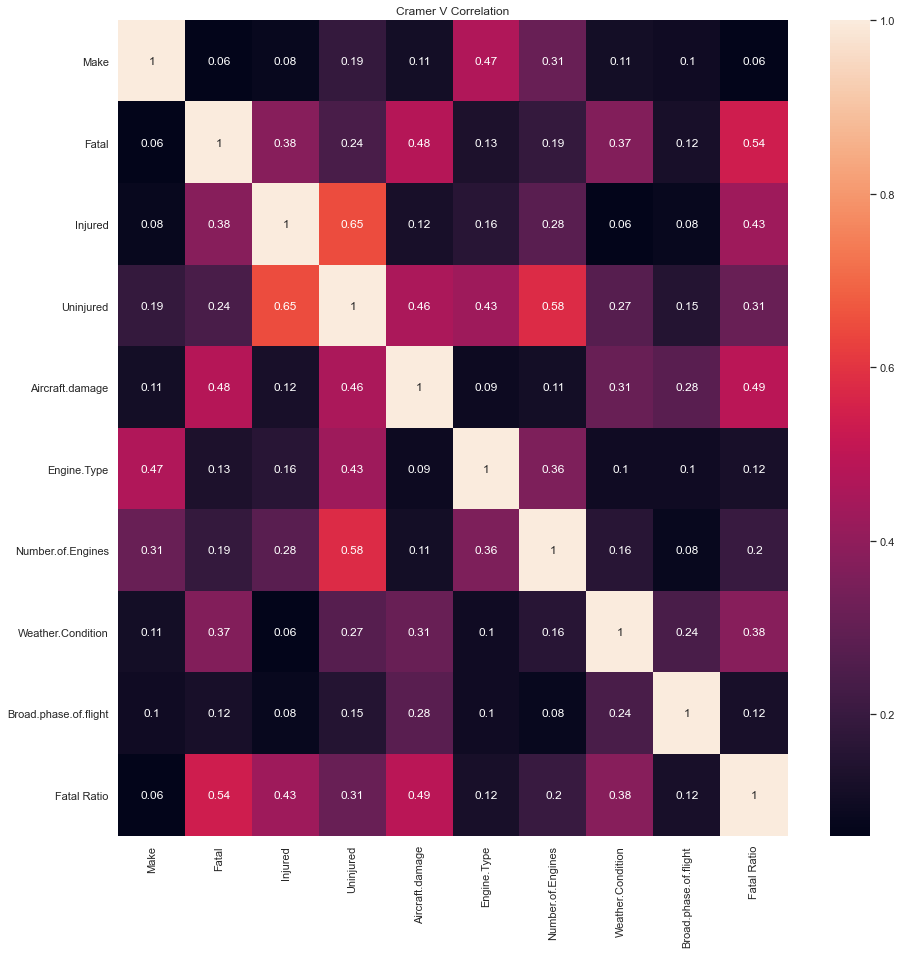

In [62]:
import itertools
import scipy.stats as ss
def cramers_v(x, y):
    cmatrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(cmatrix)[0]
    csum = cmatrix.sum().sum()
    phi2 = chi2/csum
    r,k = cmatrix.shape
    phi2correlation = max(0, phi2-((k-1)*(r-1))/(csum-1))
    rcorr = r-((r-1)**2)/(csum-1)
    kcorr = k-((k-1)**2)/(csum-1)
    return "%0.2f" % (np.sqrt(phi2correlation/min((kcorr-1),(rcorr-1))))

cols = ["Make","Fatal","Injured","Uninjured","Aircraft.damage","Engine.Type","Number.of.Engines","Weather.Condition","Broad.phase.of.flight", "Fatal Ratio"]
corrM = np.ones((len(cols),len(cols)))
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(df[col1], df[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(15, 15))
ax = sb.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation");

plt.savefig('Images/CramerV/Correlation Chart.png')

## 3. Multi-Variate Random Forest Classifier
Response Variable : **Fatal.Cat**     
Predictor Feature : **Make, Aircraft Damage, Number of Engines, Engine Type, Weather Condition, Broad Phase**      

In [63]:
df

,Day,Month,Year,Make,Aircraft.damage,Aircraft.Category,Number.of.Engines,Engine.Type,Weather.Condition,Broad.phase.of.flight,Fatal,Injured,Uninjured,Fatal.Cat,Fatal.Count,Latitude,Longitude,Fatal Ratio
0,1,1,1982,BEECH,Substantial,NaN,1,Reciprocating,VMC,Landing,0.0,0.0,1.0,Non-Fatal,0,0.0,0.0,0
1,2,1,1982,BEECH,Destroyed,Airplane,1,Reciprocating,IMC,Cruise,2.0,0.0,0.0,Fatal,2,0.0,0.0,100
2,6,1,1982,BEECH,Substantial,Airplane,1,Reciprocating,VMC,Climb,0.0,0.0,3.0,Non-Fatal,0,0.0,0.0,0
3,7,1,1982,BEECH,Substantial,Airplane,1,Reciprocating,VMC,Approach,0.0,0.0,1.0,Non-Fatal,0,0.0,0.0,0
4,12,1,1982,BEECH,Substantial,Airplane,1,Reciprocating,IMC,Descent,0.0,1.0,1.0,Non-Fatal,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52049,29,10,2007,ROBINSON,Substantial,Helicopter,1,Reciprocating,VMC,Maneuvering,0.0,0.0,1.0,Non-Fatal,0,53.353333,-168.24,0
52050,3,11,2007,ROBINSON,Substantial,Helicopter,1,Reciprocating,VMC,Landing,0.0,0.0,2.0,Non-Fatal,0,43.778889,-116.938611,0
52051,20,11,2007,ROBINSON,Substantial,Helicopter,1,Reciprocating,VMC,Landing,0.0,1.0,1.0,Non-Fatal,0,33.039166,-116.915,0
52052,24,11,2007,ROBINSON,Substantial,Helicopter,1,Reciprocating,VMC,Maneuvering,0.0,0.0,1.0,Non-Fatal,0,36.88,-76.214167,0


In [64]:
df = df[df["Fatal.Cat"] != 'Not Reported']
print(df["Fatal.Cat"].value_counts())

Non-Fatal    33519
Fatal         7159
Name: Fatal.Cat, dtype: int64


In [65]:
# Extract Response and Predictors
y = pd.DataFrame(df["Fatal.Cat"])


X = pd.DataFrame(df[["Make", "Aircraft.damage", "Number.of.Engines", "Engine.Type", "Weather.Condition", "Broad.phase.of.flight"]])

## Encode Cat data --> Numerical data
X = X.replace({'BEECH': 1, 'BELL': 2, 'BELLANCA': 3, 'BOEING': 4, 'CESSNA': 5, 'GRUMMAN': 6, 'HUGHES': 7, 'MOONEY': 8, 'PIPER': 9, 'ROBINSON': 10})
X = X.replace({'Minor': 1, 'Substantial': 2, 'Destroyed': 3})
X = X.replace({'VMC': 1, 'IMC': 2})
X = X.replace({'Standing': 1, 'Taxi': 2, 'Takeoff': 3, 'Climb': 4, 'Cruise': 5, 'Descent': 6, 'Maneuvering': 7, 'Approach': 8, 'Landing': 9, 'Go-around': 10})
X = X.replace({'Reciprocating': 1, 'Turbo Fan': 2, 'Turbo Jet': 3, 'Turbo Prop': 4, 'Turbo Shaft': 5})
X.to_csv('Data/3. ML_Data (RandomForest).csv')

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (30508, 1) (30508, 6)
Test Set  : (10170, 1) (10170, 6)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

Non-Fatal    25131
Fatal         5377
Name: Fatal.Cat, dtype: int64


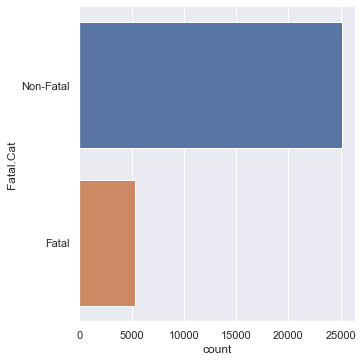

In [66]:
# Summary Statistics for Response
print(y_train["Fatal.Cat"].value_counts())

# Draw the distribution of Response
sb.catplot(y = "Fatal.Cat", data = y_train, kind = "count")

## Random Forest Classifier in Scikit-Learn

In [68]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

<ipython-input-68-c5c1278c5f61>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train)


RandomForestClassifier(max_depth=4)

## Goodness of Fit of the Model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9033696079716795

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8967551622418879



<AxesSubplot:>

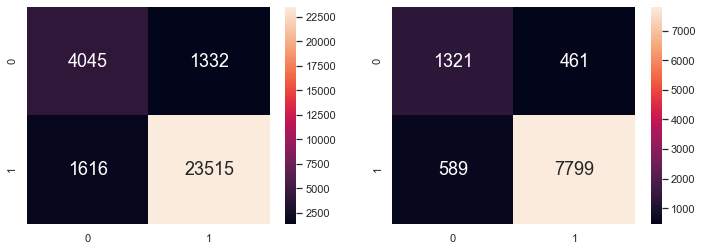

In [69]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict Legendary values corresponding to Total
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz

number = LabelEncoder()

X = pd.DataFrame(df[["Make", "Aircraft.damage", "Number.of.Engines", "Engine.Type", "Weather.Condition", "Broad.phase.of.flight"]])

## Encode Cat data --> Numerical data
X = X.replace({'BEECH': 1, 'BELL': 2, 'BELLANCA': 3, 'BOEING': 4, 'CESSNA': 5, 'GRUMMAN': 6, 'HUGHES': 7, 'MOONEY': 8, 'PIPER': 9, 'ROBINSON': 10})
X = X.replace({'Minor': 1, 'Substantial': 2, 'Destroyed': 3})
X = X.replace({'VMC': 1, 'IMC': 2})
X = X.replace({'Standing': 1, 'Taxi': 2, 'Takeoff': 3, 'Climb': 4, 'Cruise': 5, 'Descent': 6, 'Maneuvering': 7, 'Approach': 8, 'Landing': 9, 'Go-around': 10})
X = X.replace({'Reciprocating': 1, 'Turbo Fan': 2, 'Turbo Jet': 3, 'Turbo Prop': 4, 'Turbo Shaft': 5})

Y = pd.DataFrame(df["Fatal.Cat"])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object

dectree.fit(X_train, Y_train)                 # train the decision tree model

# Predict Response corresponding to X
Y_train_pred = dectree.predict(X_train)
Y_test_pred = dectree.predict(X_test)

# Plot the trained Decision Tree
f = plt.figure(figsize=(30,30))


dot_data = tree.export_graphviz(dectree, filled=True, 
          feature_names = X_train.columns, 
          class_names=['Fatal', 'Non-Fatal'])

graph = graphviz.Source(dot_data, format="svg") 
graph

graph.render('Images/RandomForest/dtree_render',view=True) 



'dtree_render.svg'

<Figure size 2160x2160 with 0 Axes>